In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import rand
from matplotlib import font_manager,rc

In [2]:
df = pd.read_csv("201112_202001_연령별인구현황_연간.csv",encoding='CP949')
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
#전라북도 = df[df['행정구역'].str.contains("전라북도")]
#전라북도 = 전라북도.drop(188)
#전라남도 = df[df['행정구역'].str.contains("전라남도")]
#전라남도 = 전라남도.drop(205)
#광주광역시 = df[df['행정구역'].str.contains("광주광역시")]

서울 = df[df['행정구역'].str.contains("서울")]
경기도 = df[df['행정구역'].str.contains("인천|경기도")]
강원도 = df[df['행정구역'].str.contains("강원")]
충청도 = df[df['행정구역'].str.contains("충청|대전|세종")]
경상도 = df[df['행정구역'].str.contains("경상|부산|울산|대구")] #부산
전라도 = df[df['행정구역'].str.contains("전라|광주")]
제주도 = df[df['행정구역'].str.contains("제주")]
전국=pd.concat([서울,경기도,강원도,충청도,경상도,전라도,제주도])

In [54]:
region=eval(input("지역(서울,경기도,강원도,충청도,전라도,경상도,제주도,전국) 입력... : "))
year = input("년도입력... : ")

a=region[['행정구역', year +'년_계_총인구수',year+'년_계_연령구간인구수']]
a['65세이상 인구 비율'] = region[year+"년_계_연령구간인구수"]/region[year+'년_계_총인구수'] * 100
a

지역(서울,경기도,강원도,충청도,전라도,경상도,제주도,전국) 입력... : 경상도
년도입력... : 2020


c:\datamining\venv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,행정구역,2020년_계_총인구수,2020년_계_연령구간인구수,65세이상 인구 비율
26,부산광역시,3399749,649546,19.105705
27,부산광역시 중구,41593,11179,26.877119
28,부산광역시 서구,107689,27015,25.086128
29,부산광역시 동구,89410,23199,25.946762
30,부산광역시 영도구,114252,31195,27.303680
...,...,...,...,...
270,경상남도 하동군,45132,15415,34.155366
271,경상남도 산청군,34978,12766,36.497227
272,경상남도 함양군,39150,13130,33.537676
273,경상남도 거창군,61455,16956,27.590920


<AxesSubplot:ylabel='행정구역'>

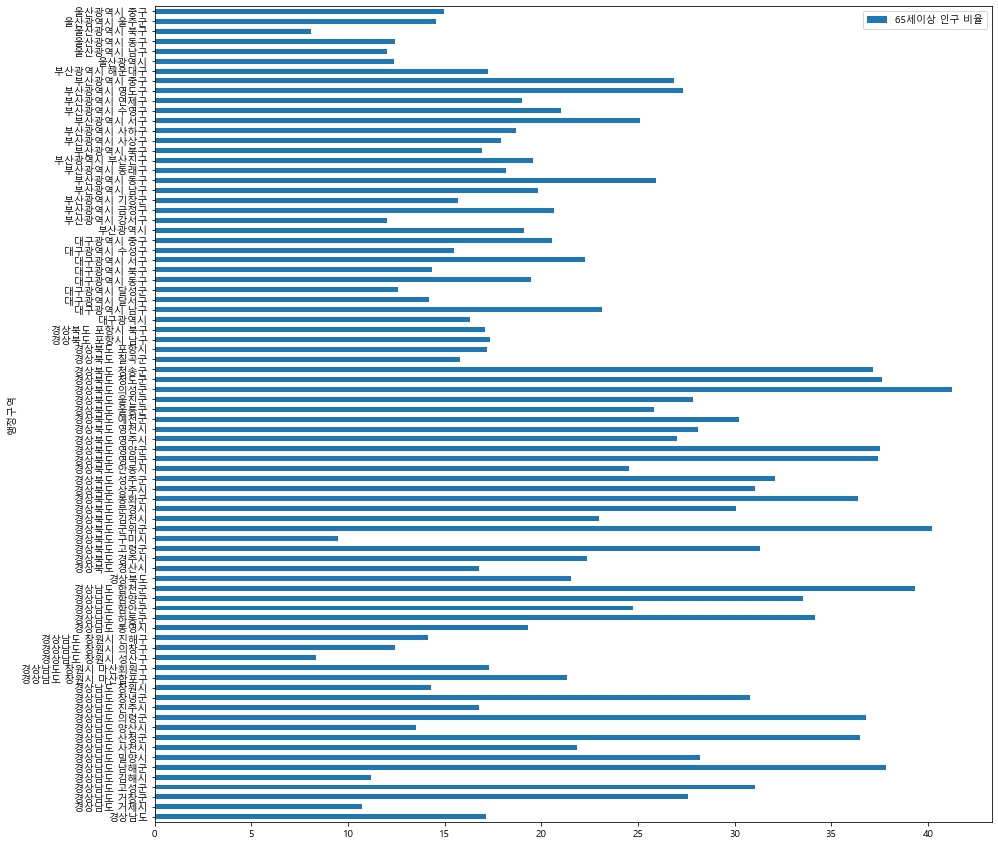

In [55]:
aa=a.pivot_table(index="행정구역", values="65세이상 인구 비율")
aa.plot(kind='barh',figsize=(15,15))

시군구 입력: 의성군


c:\datamining\venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<AxesSubplot:ylabel='년도'>

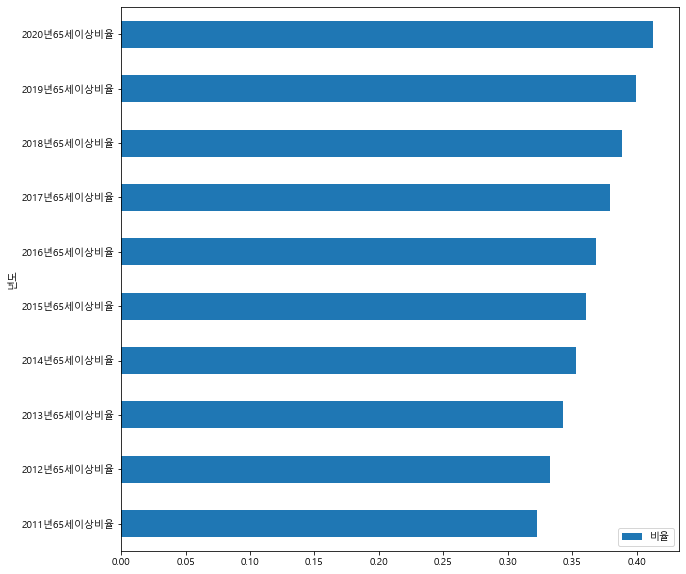

In [56]:
a_location = input("시군구 입력: ")
a_location_ = region[region["행정구역"].str.contains(a_location)]
for i in range(2011,2021):
    a_location_[str(i)+'년65세이상비율'] = a_location_.apply(lambda row: (row[str(i)+'년_계_연령구간인구수'] / row[str(i)+'년_계_총인구수']),axis=1)
over65 = a_location_.iloc[:,-10:].T
over65.columns = ["비율"]
over65.index.name="년도"
over65.pivot_table(index = "년도", values="비율")
over65.plot(kind='barh', figsize=(10,10))

In [8]:
import folium
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
geo_data = 'TL_SCCO_SIG.geojson'
center = [37.541, 126.986]
# 맵이 center 에 위치하고, zoom 레벨은 11로 시작하는 맵 m을 만듭니다.
m = folium.Map(location=center, zoom_start=10)
# Choropleth 레이어를 만들고, 맵 m에 추가합니다.
folium.Choropleth( geo_data=geo_data, data = a, columns=('행정구역', '65세이상 인구 비율'),
key_on='feature.properties.SIG_KOR_NM',
fill_color='BuPu',
legend_name='노령 인구비율' ).add_to(m)
m.save('전국비율.html')


지역 입력: 처인구

            행정구역
68  경기도 용인시 처인구 

기울기 : [[0.41850903]]
y 절편 : [-831.20402158] 

추정 년도를 입력하세요...2040
2040년도의 예측 노인 인구 비율 : [[22.55440024]]


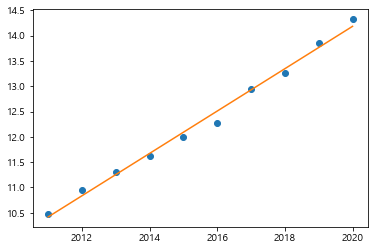

In [24]:
# coding=<utf-8>
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# -*- coding: utf-8 -*-
hw = pd.read_csv('전년도_65세이상인구비율2.csv', encoding='CP949')
hw = hw.fillna(0)

year=np.array(range(2011,2021)) #2011~2020년

location = input("지역 입력: ")
data = hw[hw['행정구역'].str.contains(location)]

exam = data.iloc[:, 2:]
exam=np.array(exam)

exam=exam.reshape(-1,1)
year=year.reshape(-1,1)


line_fit = LinearRegression()
line_fit.fit(year,exam)
y_predicted =line_fit.predict(year)

print('\n',data.filter(['행정구역']),'\n') #지역
print('기울기 :',line_fit.coef_) #기울기
print('y 절편 :',line_fit.intercept_,'\n') # 절편

X=int(input('추정 년도를 입력하세요...'))
Y=line_fit.coef_ * X + line_fit.intercept_
print(f'{X}년도의 예측 노인 인구 비율 : {Y}')

plt.plot(year,exam,'o')
plt.plot(year,y_predicted)
plt.show()

In [53]:
year = input("년도 입력: ")
hw.iloc[hw[f'{year}년 65세이상 인구 비율'].idxmax()]

년도 입력: 2020


Unnamed: 0                183
행정구역                 경상북도 의성군
2011년 65세이상 인구 비율     32.2596
2012년 65세이상 인구 비율     33.2469
2013년 65세이상 인구 비율     34.3019
2014년 65세이상 인구 비율     35.2677
2015년 65세이상 인구 비율     36.0758
2016년 65세이상 인구 비율     36.8349
2017년 65세이상 인구 비율     37.9418
2018년 65세이상 인구 비율     38.8524
2019년 65세이상 인구 비율     39.9373
2020년 65세이상 인구 비율     41.2371
Name: 182, dtype: object